## Neighbor calculation time statistics of pyscal 2.10.15 and pyscal 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pychromatic import Multiplot
from pychromatic.colors import accent

In [17]:
natoms = [250, 686, 2000, 6750,
         16000, 31250, 54000]

p2 = [5.26, 13.7, 93.4, 72.6,
     193, 397, 695]

p3 = [2.87, 18.7, 68, 287, 
     688, 1280, 2590]

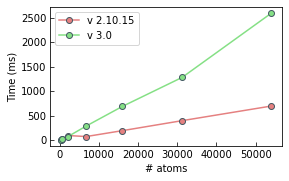

In [21]:
mlt = Multiplot(width=300)
mlt[0,0].plot(natoms, p2, 'o-', color=accent["pred"], 
              markeredgecolor=accent["lgrey"], label='v 2.10.15')
mlt[0,0].plot(natoms, p3, 'o-', color=accent["pgreen"],
             markeredgecolor=accent["lgrey"], label='v 3.0')
mlt[0,0].set_xlabel("# atoms")
mlt[0,0].set_ylabel("Time (ms)")
mlt[0,0].legend()
#mlt[0,0].set_yscale('log')
#mlt[0,0].set_xscale('log')

Effect of cell lists

In [12]:
natoms = [250, 686, 2000, 6750, 
         16000, 31250, ]

nocell = [2.78, 13.5, 93.5, 969, 
         5090, 19000]

cell = [2.32, 6.08, 20.8, 67.4, 
       177, 378]


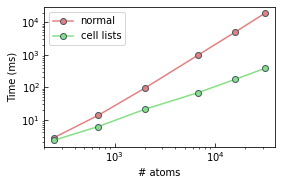

In [15]:
mlt = Multiplot(width=300)
mlt[0,0].plot(natoms, nocell, 'o-', color=accent["pred"], 
              markeredgecolor=accent["lgrey"], label='normal')
mlt[0,0].plot(natoms, cell, 'o-', color=accent["pgreen"],
             markeredgecolor=accent["lgrey"], label='cell lists')
mlt[0,0].set_xlabel("# atoms")
mlt[0,0].set_ylabel("Time (ms)")
mlt[0,0].legend()
mlt[0,0].set_yscale('log')
mlt[0,0].set_xscale('log')